In [67]:
import numpy as np
import pandas as pd
import re

df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Steps to follow
1) Get the data
2) Cleaning
- lower case
- removing leading and trailing spaces
- removing html tags or anything unnecessary
- removing urls
- expanding abbreviations
- spelling correction 
- punctuations
- remove special characters

3) Preprocessing
- tokenization - smallest part of a sentence
- stopword removal - no semantic meaning, used for sentence forming, I, could, would, etc
- stemming - converting words to root form, ex - dance, dancing, danced

4) EDA and Feature Engineering
- distribution of text length/word count
- common unigrams/bigrams/trigrams
- Wordcloud

5) Add new features
6) Text Vectorization - converting words to numbers - Eg, bagofwords (BoW), tfidf, word2vec
7) Modeling
8) Evaluation
9) Deploy
10) Monitor

Additional 
- PCA
- POS tagging

In [68]:
# Data Analyst 1 - 6
# from 7 Data scientist will take care

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [70]:
df.duplicated().sum()

418

In [71]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [72]:
# considering only 100 rows, because I want to run it quickly
df = df.sample(n=100, random_state=42)

### 2) Cleaning

In [73]:
# lower case
df.head()

,review,sentiment
29171,"""Soul Plane"" is a horrible attempt at comedy t...",negative
43589,Guest from the Future tells a fascinating stor...,positive
38712,"""National Treasure"" (2004) is a thoroughly mis...",negative
16045,"OK. First said, I just wanted to check whether...",negative
5248,"I haven't always been a fan, but the show grew...",positive


In [74]:
df.review = df.review.str.lower()
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly mis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i haven't always been a fan, but the show grew...",positive


In [75]:
# removing leading and extra spaces
df.review = df.review.str.strip(' ')
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly mis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i haven't always been a fan, but the show grew...",positive


In [76]:
# removing html tags# 
# 
# def remove_html(data):
#     data = re.sub(re.sub(r'<.*?>', '', data), '', data)
#     return data

In [77]:
# example
# remove_html('<p>My name is Anthony gonzalvez</p><br><img>')

In [78]:
# df.review.apply(remove_html)

In [79]:
# we did not use above code because the below code is much optimized than running our own loops
# or we can write it as
df.review = df.review.str.replace(r'<.*?>', '', regex=True)
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly mis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i haven't always been a fan, but the show grew...",positive


In [80]:
# removing urls
# Ex - http:www.google.com 
# - www.google.com 
# - www.amazon.co.in

# def remove_url(data):
#     data = re.sub(r"https?://\S+|www\.\S+", '', data)
#     return data

In [81]:
# example
# remove_url('Hello, to access your prize. Click here: https://amazzon.co.in')

In [82]:
# remove_url('Hello, to access your prize. Click here: http://flipcart.co.in')

In [83]:
# how to view a row with url
df[df.review.str.contains(r"https?://\S+|www\.\S+(?=\s|$)", '')]

,review,sentiment
15634,as is well-known among long haired youngsters ...,positive


In [84]:
df.review = df.review.str.replace(r"https?://\S+|www\.\S+(?=\s|$)", '', regex=True)
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly mis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i haven't always been a fan, but the show grew...",positive


In [85]:
df[df.review.str.contains(r"https?://\S+|www\.\S+",'')]

,review,sentiment


In [86]:
# Expanding abbreviations

# expand 

import re

def remove_abb(data):
    data = re.sub(r"\bhe's\b", "he is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthere's\b", "there is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwe're\b", "we are", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthat's\b", "that is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwon't\b", "will not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey're\b", "they are", data, flags=re.IGNORECASE)
    data = re.sub(r"\bcan't\b", "cannot", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwasn't\b", "was not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bdon\x89Ûªt\b", "do not", data, flags=re.IGNORECASE)
    data = re.sub(r"\baren't\b", "are not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bisn't\b", "is not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwhat's\b", "what is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bhaven't\b", "have not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bhasn't\b", "has not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthere's\b", "there is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bhe's\b", "he is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bit's\b", "it is", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou're\b", "you are", data, flags=re.IGNORECASE)
    data = re.sub(r"\bi'm\b", "I am", data, flags=re.IGNORECASE)
    data = re.sub(r"\bshouldn't\b", "should not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwouldn't\b", "would not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bdon\x89Ûªt\b", "do not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bi've\b", "I have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bi'll\b", "I will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwe've\b", "we have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey've\b", "they have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bcould've\b", "could have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bshould've\b", "should have", data, flags=re.IGNORECASE)
    data = re.sub(r"\by'all\b", "you all", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwe'd\b", "we would", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey'd\b", "they would", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou'd\b", "you would", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey'll\b", "they will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwe'll\b", "we will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey're\b", "they are", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwon't\b", "will not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bain't\b", "am not", data, flags=re.IGNORECASE)
    data = re.sub(r"\blet's\b", "let us", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwho's\b", "who is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bdoesn't\b", "does not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bdidn't\b", "did not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bweren't\b", "were not", data, flags=re.IGNORECASE)
    data = re.sub(r"\bcouldn't\b", "could not", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou've\b", "you have", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou'll\b", "you will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bi'd\b", "I would", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwe're\b", "we are", data, flags=re.IGNORECASE)
    data = re.sub(r"\bthey've\b", "they have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bweren't\b", "were not", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou've\b", "you have", data, flags=re.IGNORECASE)
    data = re.sub(r"\byou'd\b", "you would", data, flags=re.IGNORECASE)
    data = re.sub(r"\bcould've\b", "could have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bwould've\b", "would have", data, flags=re.IGNORECASE)
    data = re.sub(r"\bit'll\b", "it will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bhe'll\b", "he will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bshe'll\b", "she will", data, flags=re.IGNORECASE)
    data = re.sub(r"\bshe's\b", "she is", data, flags=re.IGNORECASE)
    data = re.sub(r"\bmight've\b", "might have", data, flags=re.IGNORECASE)

    return data

In [87]:
remove_abb("I don't know because I haven't been using it, I might've missed it and could've searched a bit more")

"I don't know because I have not been using it, I might have missed it and could have searched a bit more"

In [88]:
df.review = df.review.apply(remove_abb)
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly mis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i have not always been a fan, but the show gre...",positive


In [89]:
# spelling correction
# we will use textblob
from textblob import TextBlob 

In [90]:
text = 'Hi, I have driven all nigt and I feel lke a drnk pirson'
TextBlob(text).correct().string

'I, I have driven all night and I feel like a drink person'

In [91]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [92]:
df.review = df.review.apply(spelling_correction)
df.head()

,review,sentiment
29171,"""soul plane"" is a horrible attempt at comedy t...",negative
43589,guest from the future tells a fascinating stor...,positive
38712,"""national treasure"" (2004) is a thoroughly dis...",negative
16045,"ok. first said, i just wanted to check whether...",negative
5248,"i have not always been a fan, but the show gre...",positive


In [93]:
# punctuations
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, '')
    
    return text

In [95]:
remove_punctuation('Hi, How are you?')

'Hi How are you'

In [96]:
df.review = df.review.apply(remove_punctuation)
df.head()

,review,sentiment
29171,soul plane is a horrible attempt at comedy tha...,negative
43589,guest from the future tells a fascinating stor...,positive
38712,national treasure 2004 is a thoroughly disguis...,negative
16045,ok first said i just wanted to check whether t...,negative
5248,i have not always been a fan but the show grew...,positive


In [97]:
# replace special chars

# '[^\W\s]'
# you can create the same remove_punctuation like function for this code 

## 3) Tokenization

In [98]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\15105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [99]:
from nltk.tokenize import word_tokenize

df['tokenized_review'] = df.review.apply(word_tokenize)
df.head()

,review,sentiment,tokenized_review
29171,soul plane is a horrible attempt at comedy tha...,negative,"[soul, plane, is, a, horrible, attempt, at, co..."
43589,guest from the future tells a fascinating stor...,positive,"[guest, from, the, future, tells, a, fascinati..."
38712,national treasure 2004 is a thoroughly disguis...,negative,"[national, treasure, 2004, is, a, thoroughly, ..."
16045,ok first said i just wanted to check whether t...,negative,"[ok, first, said, i, just, wanted, to, check, ..."
5248,i have not always been a fan but the show grew...,positive,"[i, have, not, always, been, a, fan, but, the,..."


In [100]:
# remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)

    return L

In [102]:
remove_stopwords(["a", "wonderful", "little", "production", "the", "filling", "technique"])

['wonderful', 'little', 'production', 'filling', 'technique']

In [103]:
df.tokenized_review = df.tokenized_review.apply(remove_stopwords)
df.head()

,review,sentiment,tokenized_review
29171,soul plane is a horrible attempt at comedy tha...,negative,"[soul, plane, horrible, attempt, comedy, appea..."
43589,guest from the future tells a fascinating stor...,positive,"[guest, future, tells, fascinating, story, tim..."
38712,national treasure 2004 is a thoroughly disguis...,negative,"[national, treasure, 2004, thoroughly, disguis..."
16045,ok first said i just wanted to check whether t...,negative,"[ok, first, said, wanted, check, whether, movi..."
5248,i have not always been a fan but the show grew...,positive,"[always, fan, show, grew, season, 5, started, ..."


### 4) EDA and Feature Engineering
- distribution of text length/word count
- common unigrams/bigrams/trigrams
- Wordcloud 

In [104]:
df.review = df.tokenized_review.apply(lambda x: " ".join(x))
df.head()

,review,sentiment,tokenized_review
29171,soul plane horrible attempt comedy appeal peop...,negative,"[soul, plane, horrible, attempt, comedy, appea..."
43589,guest future tells fascinating story time trav...,positive,"[guest, future, tells, fascinating, story, tim..."
38712,national treasure 2004 thoroughly disguised lo...,negative,"[national, treasure, 2004, thoroughly, disguis..."
16045,ok first said wanted check whether movie avera...,negative,"[ok, first, said, wanted, check, whether, movi..."
5248,always fan show grew season 5 started see rich...,positive,"[always, fan, show, grew, season, 5, started, ..."


In [105]:
# creating new features
# make a new col with 
# character len 
# or word len 
# or char divide word 
# or no. of stopwords, vowels, consonants

In [106]:
df['char_len'] = df.review.str.len()
df.head()

,review,sentiment,tokenized_review,char_len
29171,soul plane horrible attempt comedy appeal peop...,negative,"[soul, plane, horrible, attempt, comedy, appea...",555
43589,guest future tells fascinating story time trav...,positive,"[guest, future, tells, fascinating, story, tim...",1110
38712,national treasure 2004 thoroughly disguised lo...,negative,"[national, treasure, 2004, thoroughly, disguis...",2568
16045,ok first said wanted check whether movie avera...,negative,"[ok, first, said, wanted, check, whether, movi...",2374
5248,always fan show grew season 5 started see rich...,positive,"[always, fan, show, grew, season, 5, started, ...",2728


In [107]:
df['word_len'] = df.tokenized_review.apply(len)
df.head()

,review,sentiment,tokenized_review,char_len,word_len
29171,soul plane horrible attempt comedy appeal peop...,negative,"[soul, plane, horrible, attempt, comedy, appea...",555,79
43589,guest future tells fascinating story time trav...,positive,"[guest, future, tells, fascinating, story, tim...",1110,157
38712,national treasure 2004 thoroughly disguised lo...,negative,"[national, treasure, 2004, thoroughly, disguis...",2568,351
16045,ok first said wanted check whether movie avera...,negative,"[ok, first, said, wanted, check, whether, movi...",2374,337
5248,always fan show grew season 5 started see rich...,positive,"[always, fan, show, grew, season, 5, started, ...",2728,389


<Axes: xlabel='char_len', ylabel='Count'>

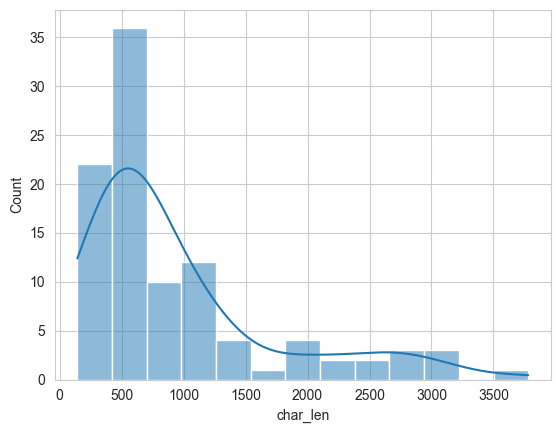

In [108]:
import seaborn as sns
sns.histplot(df['char_len'], kde=True)

In [113]:
df[df.review == 'positive']['char_len']

Series([], Name: char_len, dtype: int64)

<Axes: xlabel='char_len', ylabel='Count'>

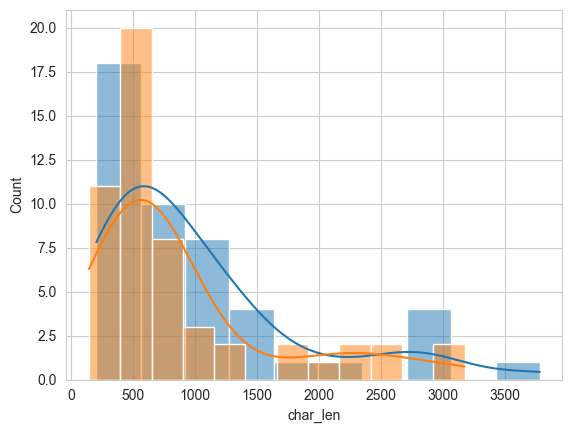

In [115]:
# If they have different curves, then this column is helpful.
# If it is not, then it is not that good

sns.histplot(df[df.sentiment == 'positive']['char_len'], kde=True)
sns.histplot(df[df.sentiment == 'negative']['char_len'], kde=True)

<Axes: xlabel='char_len', ylabel='Count'>

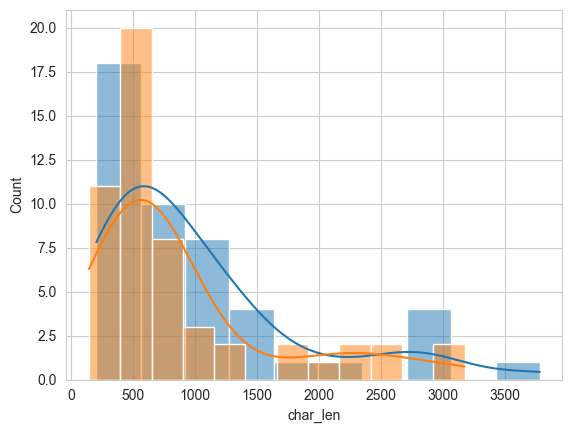

In [117]:
sns.histplot(df[df.sentiment == 'positive']['char_len'], kde=True)
sns.histplot(df[df.sentiment == 'negative']['char_len'], kde=True)

In [109]:
# These are called heuristic features

In [119]:
df.tokenized_review.sum()

['soul',
 'plane',
 'horrible',
 'attempt',
 'comedy',
 'appeal',
 'people',
 'thick',
 'skull',
 'bloodshot',
 'eyes',
 'furry',
 'pawns',
 'plot',
 'incoherent',
 'also',
 'nonextent',
 'acting',
 'mostly',
 'sub',
 'subpar',
 'gang',
 'highly',
 'chronic',
 'dreadful',
 'characters',
 'thrown',
 'bad',
 'measure',
 'jokes',
 'often',
 'spotted',
 'miles',
 'ahead',
 'almost',
 'never',
 'even',
 'bit',
 'amusing',
 'movie',
 'lacks',
 'structure',
 'full',
 'racial',
 'stereotyped',
 'must',
 'seemed',
 'old',
 'even',
 'cities',
 'thing',
 'really',
 'going',
 'pretty',
 'ladies',
 'really',
 'want',
 'rent',
 'something',
 'adult',
 'section',
 'oki',
 'hardly',
 'see',
 'anything',
 'recommend',
 'since',
 'probably',
 'lot',
 'better',
 'productive',
 'time',
 'chasing',
 'rats',
 'sledgehammer',
 'inventing',
 'waterproof',
 'teabags',
 'whatever210',
 'guest',
 'future',
 'tells',
 'fascinating',
 'story',
 'time',
 'travel',
 'friendship',
 'battle',
 'good',
 'evil',
 'small

In [120]:
# common unigrams/bigrams/trigrams
from nltk import ngrams

pd.Series(ngrams(df.tokenized_review.sum(), 3)).value_counts()

(tartar, ape, man)                 4
(tale, two, sisters)               3
(kid, n, play)                     3
(I, ever, seen)                    3
(long, ballet, sequence)           2
                                  ..
(drama, tension, back)             1
(tension, back, projection)        1
(back, projection, effect)         1
(projection, effect, uses)         1
(boomerang, meets, extremities)    1
Name: count, Length: 13518, dtype: int64

In [121]:
pd.Series(ngrams(df.tokenized_review.sum(), 2)).value_counts()

(american, paris)        8
(gene, belly)            8
(even, though)           7
(house, party)           7
(I, would)               7
                        ..
(grabs, attention)       1
(attention, enhanced)    1
(enhanced, drama)        1
(drama, meaning)         1
(meets, extremities)     1
Name: count, Length: 12993, dtype: int64

In [109]:
# we can also separately check n-grams for positive and negative 

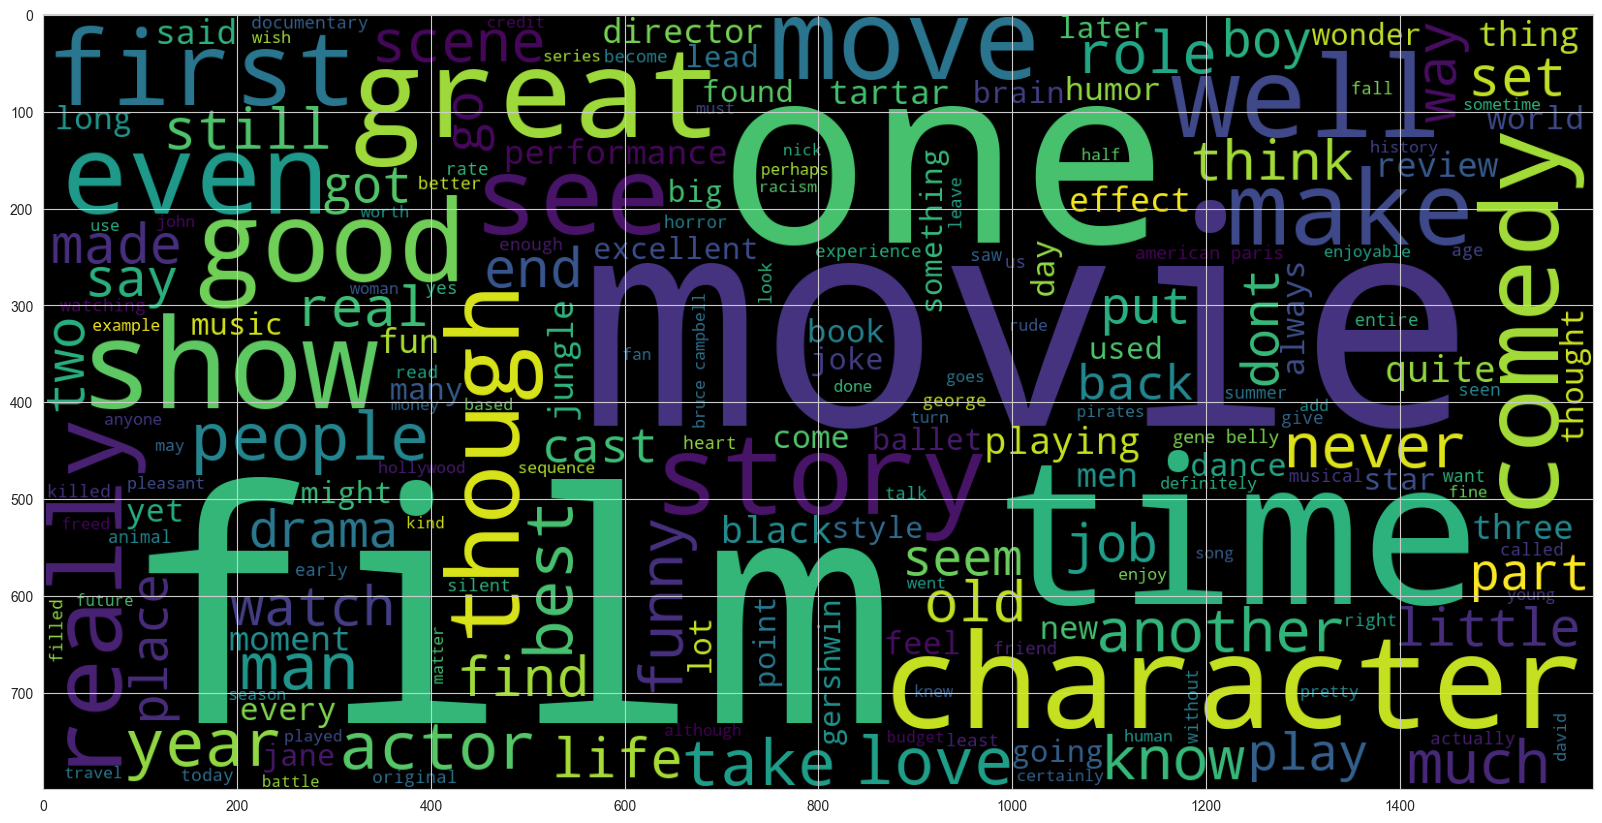

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'positive']['review']))
plt.imshow(wc)

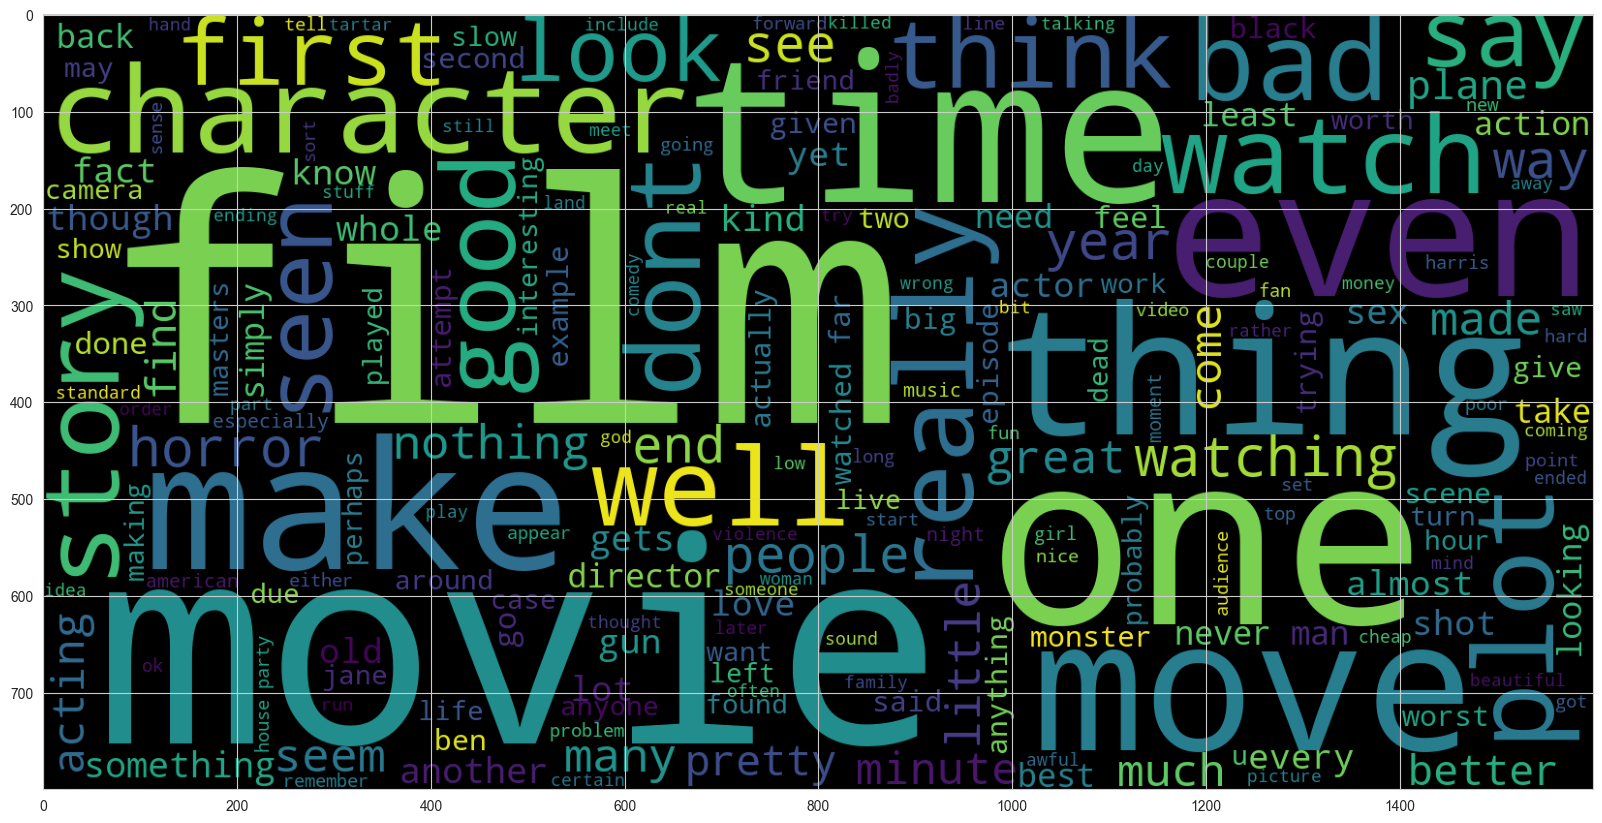

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

### Vectorization

In [136]:
# text to words
# Bag of Words BoW
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=500, ngram_range=(1, 3))
bag_of_words = count_vectorizer.fit_transform(df.review)
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())
bag_of_words

,10,80s,able,acting,action,actor,actors,actually,allowed,almost,...,would,writers,writing,wrong,year,years,years later,yes,yet,young
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,1,0,2,0,1,...,0,0,0,2,4,0,0,1,2,0
4,1,0,0,0,0,2,1,0,1,0,...,8,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
97,0,1,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,1,0
98,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### PCA

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

pca_result.shape

(100, 2)

<Axes: >

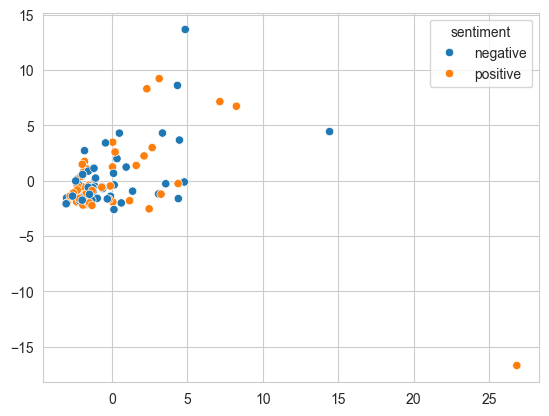

In [139]:
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df.sentiment)

In [109]:
# Parts of speech tagging